In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
 9   Admission          400 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 31.4 KB


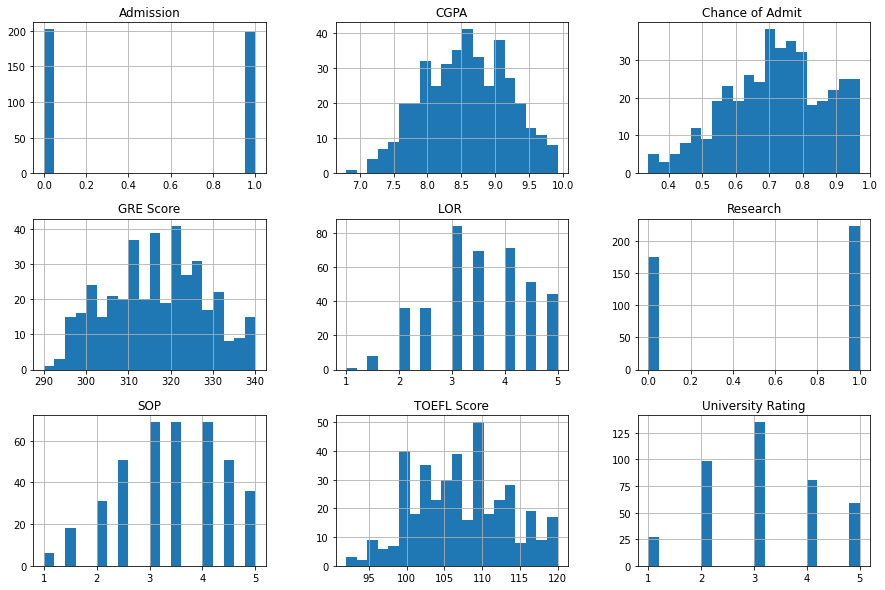

In [4]:
train=train.drop(labels=['Serial No.'],axis=1)
test=test.drop(labels=['Serial No.'],axis=1)
train.hist(bins=20,figsize=(15,10))
plt.show()

In [5]:
from sklearn.pipeline import Pipeline as pl
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [6]:
from sklearn import svm

In [7]:
train.shape

(400, 9)

In [8]:
X_train = train.values[:,:-1]
y_train = train.values[:,-1]
X_test = test.values[:,:-1]
y_test = test.values[:,-1]

In [16]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

/home/home1/xs76/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred = clf.predict(X_test)

In [18]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.84


In [19]:
clf2 = svm.SVC(kernel='poly')
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

/home/home1/xs76/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.96


In [20]:
clf3 = svm.SVC(kernel='linear')
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.87


In [21]:
clf4 = svm.SVC(kernel='sigmoid')
clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.5


/home/home1/xs76/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
print("Best Precision:",metrics.precision_score(y_test, y_pred2))
print("From polynomial classifier")
print("Recall:",metrics.recall_score(y_test, y_pred2))

Best Precision: 0.96
From polynomial classifier
Recall: 0.96
